In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyincore import IncoreClient, FragilityService, MappingSet, Dataset
from pyincore.analyses.montecarlofailureprobability import MonteCarloFailureProbability
from pyincore.analyses.buildingfunctionality import BuildingFunctionality
from pyincore.analyses.buildingdamage import BuildingDamage
from pyincore.analyses.epfdamage import EpfDamage

In [2]:
# define client
client = IncoreClient()

In [3]:
### Tornado

In [4]:
# The simulated EF-5 tornado shows geographical locations and the range
# of wind speed of tornado hazard in Joplin.
hazard_type = "tornado"
hazard_id = "5d07cbeab9219c065b080930"

## Chaining with Joplin Building Damage

### Building damage

In [5]:
bldg_dmg = BuildingDamage(client)

mapping_id = "5d8942dfb9219c068ea795ea"  # Create a mapping to assign tornado fragilities to 19 building archetypes.
fragility_service = FragilityService(client)        # loading fragility mapping
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))
bldg_dmg.set_input_dataset("dfr3_mapping_set", mapping_set)

bldg_dataset_id = "5dbc8478b9219c06dd242c0d"  # Load the Joplin building dataset, which is a package of GIS files.

bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)
result_name = "Joplin_bldg_dmg_result"
bldg_dmg.set_parameter("result_name", result_name)
bldg_dmg.set_parameter("hazard_type", hazard_type)
bldg_dmg.set_parameter("hazard_id", hazard_id)
bldg_dmg.set_parameter("num_cpu", 4)  # Define the result name, etc., and choose the number of CPU locally
                                      # to run the model parallelly.

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [6]:
bldg_dmg.run_analysis()

True

### Monte Carlo buildings failure probability

In [7]:
building_dmg_result = bldg_dmg.get_output_dataset('result')

mc = MonteCarloFailureProbability(client)
mc.set_input_dataset("damage", building_dmg_result)
mc.set_parameter("num_cpu", 4)
mc.set_parameter("num_samples", 10)
mc.set_parameter("damage_interval_keys", ["insignific", "moderate", "heavy", "complete"])
mc.set_parameter("failure_state_keys", ["moderate", "heavy", "complete"])

mc.set_parameter("result_name", "mcs_buildings_samples")

True

In [8]:
mc.run_analysis()

True

In [9]:
building_damage_mcs_samples = mc.get_output_dataset('sample_failure_state')
df_bdms = building_damage_mcs_samples.get_dataframe_from_csv()
# Display top 5 rows of output data
df_bdms.head()

guid              failure
0  b497b88f-a4ba-48b1-8438-5cfc68147cfc  1,1,1,1,1,1,1,1,1,1
1  6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc  1,1,1,1,1,1,1,1,1,1
2  758fb3de-108a-4e04-895e-fdc4b8627876  1,1,1,1,1,1,1,1,1,1
3  7b706697-bf9b-4883-90f6-862d67a8e64b  1,1,1,1,1,1,1,1,1,1
4  19c91f9b-f679-4263-b7a3-e76fd859c4b1  1,1,1,1,1,1,1,1,1,1

## Chaining with Joplin Electrical Power Facility

### Substations Damage

In [10]:
epf_substations_dmg = EpfDamage(client)

epf_sub_mapping_id = "5d8a326fb9219c068ea798e7"  # Create a mapping to assign tornado fragilities to substations.
fragility_service = FragilityService(client)        # loading fragility mapping
mapping_set = MappingSet(fragility_service.get_mapping(epf_sub_mapping_id))
epf_substations_dmg.set_input_dataset("dfr3_mapping_set", mapping_set)

epf_substations_id = "5d92355bb9219c06ae7e386a"

epf_substations_dmg.load_remote_input_dataset("epfs", epf_substations_id)
result_name = "Joplin_epf_substations_dmg_result"
epf_substations_dmg.set_parameter("result_name", result_name)
epf_substations_dmg.set_parameter("hazard_type", hazard_type)
epf_substations_dmg.set_parameter("hazard_id", hazard_id)
epf_substations_dmg.set_parameter("num_cpu", 4)
epf_substations_dmg.set_parameter("fragility_key", "substations")

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [11]:
epf_substations_dmg.run_analysis()

True

### MC substations failure probability

In [12]:
substation_dmg_result = epf_substations_dmg.get_output_dataset('result')

mc = MonteCarloFailureProbability(client)
mc.set_input_dataset("damage", substation_dmg_result)
mc.set_parameter("num_cpu", 4)
mc.set_parameter("num_samples", 10)
mc.set_parameter("damage_interval_keys", ["ds-none","ds-slight","ds-moderat","ds-extensi","ds-complet"])
mc.set_parameter("failure_state_keys", ["ds-slight", "ds-moderat", "ds-extensi", "ds-complet"])

mc.set_parameter("result_name", "mcs_substations_samples")

True

In [13]:
mc.run_analysis()

True

In [14]:
substations_damage_mcs_samples = mc.get_output_dataset('sample_failure_state')
df_sdms = substations_damage_mcs_samples.get_dataframe_from_csv()
df_sdms.head()

guid              failure
0  7f426763-81c6-4cac-b98d-c37a5e439b90  1,1,1,1,1,1,1,1,1,1
1  fc8add00-6760-4752-b1fb-7d6ca813f535  1,1,1,1,1,1,1,1,1,1
2  e8f4939d-763f-4743-bc61-c23e0b8e0f7a  1,1,1,1,1,1,1,1,1,1
3  2cab48ff-c5ce-495e-9662-67c9a177efc4  1,1,1,1,1,1,1,1,1,1
4  eb4ce929-5164-4ebf-ace2-708096d89db5  1,1,1,1,1,1,1,1,1,1

### Poles Damage

In [15]:
epf_poles_id = "5d923daab9219c06ae84afb0"  # Load the Joplin poles dataset, which is a package of GIS files.

epf_poles_mapping_id = "5d923ea8b9219c06aec7569a"  # Create a mapping to assign tornado fragilities to poles.

epf_poles_dmg = EpfDamage(client)

epf_poles_dmg.load_remote_input_dataset("epfs", epf_poles_id)

fragility_service = FragilityService(client)        # loading fragility mapping
mapping_set = MappingSet(fragility_service.get_mapping(epf_poles_mapping_id))
epf_poles_dmg.set_input_dataset("dfr3_mapping_set", mapping_set)

result_name = "Joplin_epf_poles_dmg_result"
epf_poles_dmg.set_parameter("result_name", result_name)
epf_poles_dmg.set_parameter("hazard_type", hazard_type)
epf_poles_dmg.set_parameter("hazard_id", hazard_id)
epf_poles_dmg.set_parameter("num_cpu", 4)
epf_poles_dmg.set_parameter("fragility_key", "poles")

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [16]:
epf_poles_dmg.run_analysis()

True

### MC poles failure probability

In [17]:
pole_dmg_result = epf_poles_dmg.get_output_dataset('result')

mc = MonteCarloFailureProbability(client)
mc.set_input_dataset("damage", pole_dmg_result)
mc.set_parameter("num_cpu", 8)
mc.set_parameter("num_samples", 10)
mc.set_parameter("damage_interval_keys", ["ds-none","ds-slight","ds-moderat","ds-extensi","ds-complet"])
mc.set_parameter("failure_state_keys", ["ds-slight", "ds-moderat", "ds-extensi", "ds-complet"])

mc.set_parameter("result_name", "mcs_poles_samples")

True

In [18]:
mc.run_analysis()

True

In [19]:
poles_damage_mcs_samples = mc.get_output_dataset('sample_failure_state')
df_pdms = poles_damage_mcs_samples.get_dataframe_from_csv()
df_pdms.head()

guid              failure
0  cffe8f2e-9887-456b-9625-5ed122b68c45  1,1,1,1,1,1,1,1,1,1
1  54efa7ba-475f-4b1d-8821-42d156cb3f7d  1,1,1,1,1,1,1,1,1,1
2  d0f52ad0-1187-4c0d-9a72-c02687c19778  1,1,1,1,1,1,1,1,1,1
3  901ae6cb-01d5-4936-a3fe-729d930e76ab  1,1,1,1,1,1,1,1,1,1
4  958d0146-1dd5-4b10-8d16-9ec44e7b3010  1,1,1,1,1,1,1,1,1,1

## Chaining with building functionality analysis

In [20]:
bldg_func = BuildingFunctionality(client)

# Load the datasets of building samples, substation samples, and pole samples. All of the samples are randomly 
# generated using the Monte Carlo Simulation module introduced in the previous section.
bldg_func.set_input_dataset("building_damage_mcs_samples", building_damage_mcs_samples)
bldg_func.set_input_dataset("substations_damage_mcs_samples", substations_damage_mcs_samples)
bldg_func.set_input_dataset("poles_damage_mcs_samples", poles_damage_mcs_samples)
# Load the dataset of the interdependency table between buildings and substations, and between buildings and poles.
interdependency_id = "5dcf4a34b9219ca5e4118312"
bldg_func.load_remote_input_dataset("interdependency_dictionary", interdependency_id)

bldg_func.set_parameter("result_name", "mcs_functionality_probability")

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [21]:
bldg_func.run_analysis()

True

In [22]:
bldg_functionality = bldg_func.get_output_dataset('result')
df_bldg_func = bldg_functionality.get_dataframe_from_csv()
df_bldg_func.head()

building_guid  probability
0  b497b88f-a4ba-48b1-8438-5cfc68147cfc          1.0
1  6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc          1.0
2  758fb3de-108a-4e04-895e-fdc4b8627876          1.0
3  7b706697-bf9b-4883-90f6-862d67a8e64b          1.0
4  19c91f9b-f679-4263-b7a3-e76fd859c4b1          1.0

### Building functionality, a single MC run

In [23]:
mc_run = 4 # must be an even number otherwise we choose comma from the mc failure string ('0,1,1,1,1,0')

In [24]:
# we use the results of MC simulations and choose only one run, defined by mc_run variable
building_damage_run = df_bdms.copy()
station_damage_run = df_sdms.copy()
pole_damage_run = df_pdms.copy()

building_damage_run['failure'] = df_bdms['failure'].str[mc_run]
station_damage_run['failure'] = df_sdms['failure'].str[mc_run]
pole_damage_run['failure'] = df_pdms['failure'].str[mc_run]

building_damage_run.head()

guid failure
0  b497b88f-a4ba-48b1-8438-5cfc68147cfc       1
1  6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc       1
2  758fb3de-108a-4e04-895e-fdc4b8627876       1
3  7b706697-bf9b-4883-90f6-862d67a8e64b       1
4  19c91f9b-f679-4263-b7a3-e76fd859c4b1       1

In [25]:
station_damage_run.head()

guid failure
0  7f426763-81c6-4cac-b98d-c37a5e439b90       1
1  fc8add00-6760-4752-b1fb-7d6ca813f535       1
2  e8f4939d-763f-4743-bc61-c23e0b8e0f7a       1
3  2cab48ff-c5ce-495e-9662-67c9a177efc4       1
4  eb4ce929-5164-4ebf-ace2-708096d89db5       1

In [26]:
pole_damage_run.head()

guid failure
0  cffe8f2e-9887-456b-9625-5ed122b68c45       1
1  54efa7ba-475f-4b1d-8821-42d156cb3f7d       1
2  d0f52ad0-1187-4c0d-9a72-c02687c19778       1
3  901ae6cb-01d5-4936-a3fe-729d930e76ab       1
4  958d0146-1dd5-4b10-8d16-9ec44e7b3010       1

In [27]:
bldg_func_run = BuildingFunctionality(client)

bldg_func_run.set_input_dataset("building_damage_mcs_samples", Dataset.from_dataframe(building_damage_run, "sample_failure_state"))
bldg_func_run.set_input_dataset("substations_damage_mcs_samples", Dataset.from_dataframe(station_damage_run, "sample_failure_state"))
bldg_func_run.set_input_dataset("poles_damage_mcs_samples", Dataset.from_dataframe(pole_damage_run, "sample_failure_state"))
bldg_func_run.load_remote_input_dataset("interdependency_dictionary", interdependency_id)

bldg_func_run.set_parameter("result_name", "Joplin_run_functionality_probability")

dataset type does not match - given type: csv spec types: ['incore:sampleFailureState']
dataset type does not match - given type: csv spec types: ['incore:sampleFailureState']
dataset type does not match - given type: csv spec types: ['incore:sampleFailureState']
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [28]:
bldg_func_run.run_analysis()  # Run the module to obtain the building functionality probabilities.

bldg_func_run_probability = bldg_func.get_output_dataset('result')

building_prob_run = bldg_func_run_probability.get_dataframe_from_csv()
building_prob_run.head()

Error reading dataset: required dataset is missing - spec: {'id': 'building_damage_mcs_samples', 'required': True, 'description': 'building damage samples', 'type': ['incore:sampleFailureState']}


building_guid  probability
0  b497b88f-a4ba-48b1-8438-5cfc68147cfc          1.0
1  6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc          1.0
2  758fb3de-108a-4e04-895e-fdc4b8627876          1.0
3  7b706697-bf9b-4883-90f6-862d67a8e64b          1.0
4  19c91f9b-f679-4263-b7a3-e76fd859c4b1          1.0

In [29]:
# calculate means and standard deviations of al three infrastructure failures and combined functionality 
building_prob_run['probability'] = building_prob_run[['probability']].apply(pd.to_numeric)
bf_mean = building_prob_run['probability'].mean()
bf_std = building_prob_run['probability'].std()

building_damage_run['failure'] = building_damage_run[['failure']].apply(pd.to_numeric)
bd_mean = building_damage_run['failure'].mean()
bd_std = building_damage_run['failure'].std()

station_damage_run['failure'] = station_damage_run[['failure']].apply(pd.to_numeric)
sd_mean = station_damage_run['failure'].mean()
sd_std = station_damage_run['failure'].std()

pole_damage_run['failure'] = pole_damage_run[['failure']].apply(pd.to_numeric)
po_mean = pole_damage_run['failure'].mean()
po_std = pole_damage_run['failure'].std()

# intialise damage data
damage_data = {'infra':['Building nonfunctional', 'Building damage', 'Substation damage', 'Pole damage'],
               'percentage':[bf_mean, bd_mean, sd_mean, po_mean],
               'std':[bf_std, bd_std, sd_mean, po_std]}

# create DataFrame and save it as a csv file
ps = pd.DataFrame(damage_data)
ps.to_csv('physical_service.csv')

# Print the output.
print(ps)

                    infra  percentage       std
0  Building nonfunctional    0.479064  0.499425
1         Building damage    0.806834  0.394789
2       Substation damage    0.833333  0.833333
3             Pole damage    0.842772  0.364024


### Physical Service Resilience Metrics

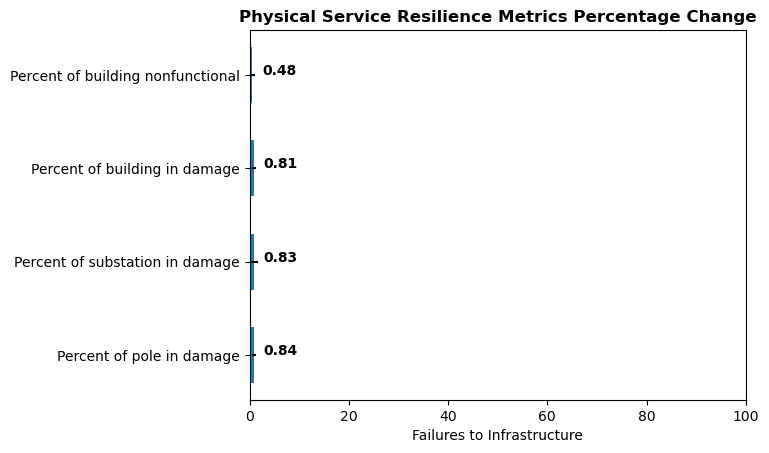

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()

infra = ('Percent of building nonfunctional', 'Percent of building in damage', 'Percent of substation in damage',\
         'Percent of pole in damage')
y_pos = np.arange(len(infra))
performance = ps['percentage']

for i, v in enumerate(round(performance,2)):
    ax.text(v + 2, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, xerr=ps['std'], align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(infra)
ax.invert_yaxis()
ax.set_xlabel('Failures to Infrastructure')
ax.set_title('Physical Service Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 100)
plt.show()  # Physical service resilience metrics percentage change immediately after the simulated EF-5 tornado.